In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wright - Fisher simulation

In [3]:
def wright_fisher (S_AF, popsize, selection = 0):
    N = 2*popsize
    F = [S_AF]

    while S_AF > 0 and S_AF < 1:
        nextgen = random.binomial(N, S_AF)
        S_AF = nextgen / N
        F.append(S_AF)
    return F        

In [6]:
print(wright_fisher(0.5, 1000))

[0.5, 0.4775, 0.4775, 0.465, 0.4615, 0.4655, 0.4735, 0.4735, 0.4675, 0.46, 0.4495, 0.4425, 0.4515, 0.431, 0.45, 0.4625, 0.464, 0.4735, 0.4705, 0.467, 0.4575, 0.46, 0.4465, 0.453, 0.4635, 0.4775, 0.492, 0.4925, 0.499, 0.488, 0.486, 0.477, 0.487, 0.4825, 0.4795, 0.475, 0.48, 0.4625, 0.472, 0.475, 0.469, 0.459, 0.4655, 0.4695, 0.4525, 0.4455, 0.424, 0.433, 0.4335, 0.431, 0.456, 0.4665, 0.4595, 0.474, 0.472, 0.458, 0.428, 0.399, 0.4045, 0.3975, 0.402, 0.415, 0.422, 0.4265, 0.439, 0.4395, 0.4475, 0.441, 0.4195, 0.439, 0.4465, 0.462, 0.436, 0.445, 0.4675, 0.4845, 0.481, 0.4815, 0.495, 0.496, 0.491, 0.476, 0.4965, 0.5035, 0.501, 0.508, 0.5115, 0.5215, 0.5135, 0.519, 0.5195, 0.5195, 0.531, 0.5275, 0.517, 0.528, 0.5195, 0.5485, 0.555, 0.5475, 0.5565, 0.5665, 0.587, 0.576, 0.5735, 0.5885, 0.5835, 0.5945, 0.602, 0.6265, 0.6245, 0.6185, 0.623, 0.6375, 0.6345, 0.647, 0.6575, 0.6375, 0.644, 0.652, 0.65, 0.6565, 0.6585, 0.668, 0.648, 0.636, 0.633, 0.641, 0.628, 0.647, 0.656, 0.66, 0.6655, 0.6325, 0.6

# 2. Plot of population allele frequencies over generations

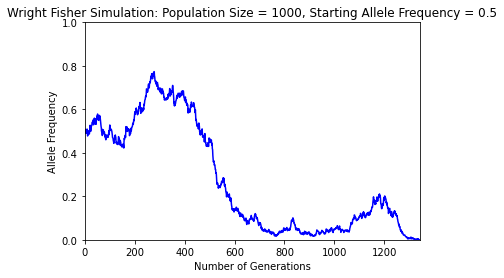

In [9]:
def generations (F):
    generations = list(range(len(F)))
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.lineplot(x=generations, y=F, color = 'blue', ax=ax)
    ax.set_xlim([0, len(F)])
    ax.set_ylim(0, 1)
    ax.set_title('Wright Fisher Simulation: Population Size = 1000, Starting Allele Frequency = 0.5')
    ax.set_xlabel('Number of Generations')
    ax.set_ylabel('Allele Frequency')

generations(wright_fisher(0.5, 1000))

# 3. Histogram with density showing time to fixation over (at least) 1000 trials. Starting allele freq = 0.5, popsize = 100

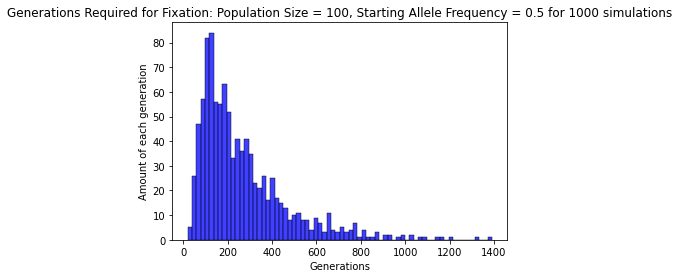

In [7]:
def histogram (S_AF, popsize, simulations = 1000, selection =0):
    generations = []
    for item in range(simulations):
        generations.append(len(wright_fisher(S_AF, popsize, selection)) - 1)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(generations, bins=70, color='blue', ax=ax)
    ax.set_title('Generations Required for Fixation: Population Size = 100, Starting Allele Frequency = 0.5 for 1000 simulations')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Amount of each generation')
    plt.show()
histogram(0.5, 100)

# 4. Fixation time vs (N) Starting allele frequency of 0.5 and vary popsize

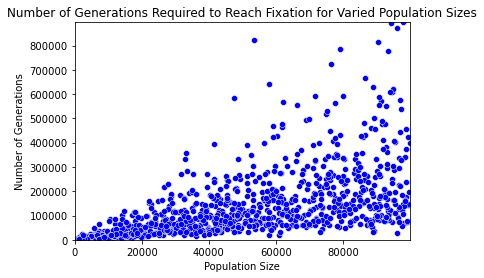

In [17]:
popsizes = []
fixation_times = []

for trial in range(1000):
    popsize = random.randint(100, 100000)
    popsizes.append(popsize)
        
    FT = wright_fisher(0.5, popsize)
    fixation_times.append(len(FT)-1)
    

fig, ax = plt.subplots(figsize = (6, 4))
ax.set_xlim([0, max(popsizes)])
ax.set_ylim([0, max(fixation_times)])
sns.scatterplot(x=popsizes, y=fixation_times, ax=ax, color='blue')
ax.set_title("Number of Generations Required to Reach Fixation for Varied Population Sizes")
ax.set_xlabel('Population Size')
ax.set_ylabel('Number of Generations')
plt.show()

# 5. Simulation of time to fixation with varying allele frequency. Plot starting allele frequency vs. number of generations to fix

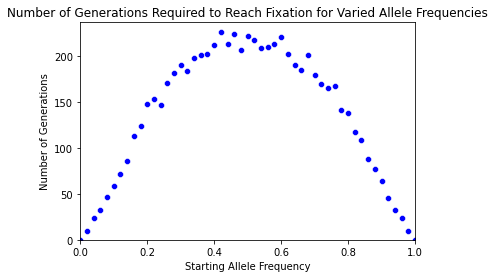

In [6]:
def variedAF(S_AF, popsize, simulations = 1000, selection =0):
    generations = []
    for item in range(simulations):
        generations.append(len(wright_fisher(S_AF, popsize, selection)) - 1)
    return generations
    
#set range of frequencies 
variedfreqs = [0.02*i for i in range(0, 51)]
#use function with range of frequencies
gens=[]
for number in variedfreqs: 
    median_generation = np.median(variedAF(number, 100, 1000))
    gens.append(median_generation)

#plot
fig, ax = plt.subplots(figsize = (6, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, max(gens)+10])
sns.scatterplot(x=variedfreqs, y=gens, ax=ax, color='blue')
ax.set_title("Number of Generations Required to Reach Fixation for Varied Allele Frequencies")
ax.set_xlabel('Starting Allele Frequency')
ax.set_ylabel('Number of Generations')
plt.show()

# 6. Selection  

# Plot the allele frequency trajectory for some chosen parameters

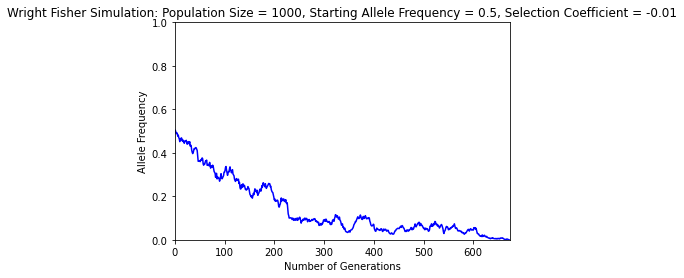

In [17]:
def wright_fisher (S_AF, popsize, selection):
    N = 2*popsize
    F = [S_AF]
    while S_AF > 0 and S_AF < 1:
        if selection < 0: 
            selection2 = -selection 
            i2 = (1-S_AF) * N
            S_AF = 1 - (i2*(1+selection2)/(N-i2+i2*(1+selection2)))
        elif selection > 0:
            i = S_AF*N
            S_AF = i*(1+selection)/(N-i+i*(1+selection))        
        nextgen = random.binomial(N, S_AF)
        S_AF = nextgen / N
        F.append(S_AF)
    return F

def generations_selection (F):
    generations = list(range(len(F)))
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.lineplot(x=generations, y=F, color = 'blue', ax=ax)
    ax.set_xlim([0, len(F)])
    ax.set_ylim(0, 1)
    ax.set_title('Wright Fisher Simulation: Population Size = 1000, Starting Allele Frequency = 0.5, Selection Coefficient = -0.01')
    ax.set_xlabel('Number of Generations')
    ax.set_ylabel('Allele Frequency')

generations_selection(wright_fisher(0.5, 1000, -0.01))


# Plot selection coefficient vs time to fixation for a fixed population size of your choice

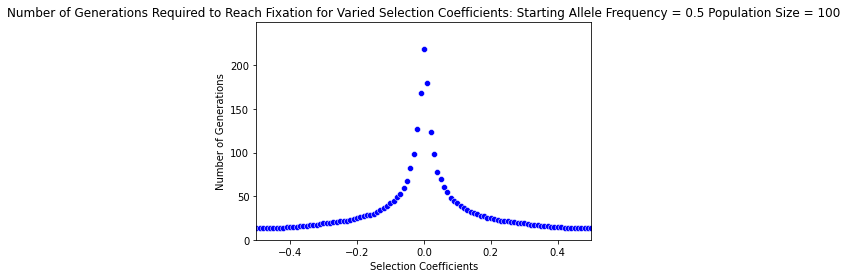

In [14]:
def selection(S_AF, popsize, selection, simulations = 1000):
    generations = []
    for item in range(simulations):
        generations.append(len(wright_fisher(S_AF, popsize, selection)) - 1)
    return generations

variedselections = [0.01*i for i in range (-50, 51)]
generations_selection = []
for number in variedselections: 
    median_generation = np.median(selection(0.5, 100, number, 1000))
    generations_selection.append(median_generation)
    
fig, ax = plt.subplots(figsize = (6, 4))
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([0, max(generations_selection)+30])
sns.scatterplot(x=variedselections, y=generations_selection, ax=ax, color='blue')
ax.set_title("Number of Generations Required to Reach Fixation for Varied Selection Coefficients: Starting Allele Frequency = 0.5 Population Size = 100")
ax.set_xlabel('Selection Coefficients')
ax.set_ylabel('Number of Generations')
plt.show()